# Business Intelligence

Cose da fare:

*   bmi bambini da lasciare e discutere
*   commenti sul codice
*   inserire decision trees
*   giustificare il non utilizzo della cross validation
*   Grafici per comparare risultati acc, prec, roc curve













Montaggio del Drive per import dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dei pacchetti necessari all'analisi

In [25]:
%%capture

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import GradientBoostingClassifier

Import del dataset di training

In [3]:
# Import dataset
diabetes_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_train.csv', na_values= ' ?')

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64.822537,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59.912290,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67.853267,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57.985607,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70.278133,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19.354174,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70.000000,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60.000000,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27.000000,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Quali features presentano dati nulli:

In [4]:
# Count the number of missing values for each column
diabetes_train.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
Insulin_Sensitivity_Est,111
BMI_Glucose_Interaction,0


Print di alcune informazioni sul dataset non preprocessato

In [5]:
print(diabetes_train.size, "\n",  diabetes_train.shape, "\n", diabetes_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   588 non-null    object 
 1   age                      588 non-null    float64
 2   hypertension             588 non-null    int64  
 3   heart_disease            588 non-null    int64  
 4   smoking_history          588 non-null    object 
 5   bmi                      588 non-null    float64
 6   HbA1c_level              588 non-null    float64
 7   blood_glucose_level      588 non-null    float64
 8   Insulin_Sensitivity_Est  477 non-null    float64
 9   BMI_Glucose_Interaction  588 non-null    float64
 10  Random_Lab_Marker        588 non-null    float64
 11  diabetes                 588 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 55.3+ KB
7056 
 (588, 12) 
 None


# Preprocessing

Trasformazione dell'attributo "age" da float a intero e rimozione dei record con "age" < 1.

In [6]:
# Float to int
diabetes_train['age'] = diabetes_train['age'].astype(int)

# Removing "age" = 0
diabetes_train = diabetes_train[diabetes_train['age'] > 1]

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Trasformazione dei record con "smoking_history" = "No info" in:
*   "never" se il paziente ha età inferiore a 15 anni;
*   "current se il paziente ha età superiore a 15 anni.



In [7]:
# Trasforming features to eliminate missing values

diabetes_train.loc[
    (diabetes_train['age'] < 15) & (diabetes_train['smoking_history'] == 'No Info'),
    'smoking_history'
] = 'never'

diabetes_train.loc[
    (diabetes_train['age'] >= 15) & (diabetes_train['smoking_history'] == 'No Info'),
    'smoking_history'
] = 'current'

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,current,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Valori nulli nella feature "Insulin_Sensitivity_Est" sostituiti con la moda del dataset

In [8]:
# Fill NaNs in numerical columns with mean (or median)

for col in diabetes_train.select_dtypes(include=np.number).columns:
    mean_val = diabetes_train[col].mean()
    diabetes_train[col].fillna(mean_val, inplace=True)

display(diabetes_train)

<ipython-input-8-5c898a36b2a4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_train[col].fillna(mean_val, inplace=True)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,current,27.320000,6.000000,200.000000,0.803267,5464.000000,60.704415,0


In [9]:
print(diabetes_train.isna().sum())

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
Insulin_Sensitivity_Est    0
BMI_Glucose_Interaction    0
Random_Lab_Marker          0
diabetes                   0
dtype: int64


In [10]:
diabetes_train['diabetes'].value_counts()

,count
diabetes,
0,432
1,147


In [11]:
diabetes_train.describe

<bound method NDFrame.describe of      gender  age  hypertension  heart_disease smoking_history        bmi  \
0      Male   64             0              0           never  27.097915   
1      Male   59             1              0           never  33.206670   
2      Male   67             0              0          former  30.639790   
3      Male   57             0              0           never  32.609541   
4      Male   70             0              0         current  37.703827   
..      ...  ...           ...            ...             ...        ...   
583  Female   19             0              0          former  28.670601   
584  Female   70             0              0     not current  24.750000   
585    Male   60             0              1         current  29.050000   
586  Female   27             0              0         current  27.320000   
587    Male   80             0              0            ever  17.350000   

     HbA1c_level  blood_glucose_level  Insulin_Sensitivity_Est  \
0       6.517746           157.338059                 1.220942   
1       7.971341           148.625701                 0.807652   
2       8.919297           240.733664                 1.225950   
3       8.759698           154.640163                 1.432736   
4       6.261874           169.415511                 0.684205   
..           ...                  ...                      ...   
583     5.248329           160.905601                 0.959618   
584     3.500000           159.000000                -1.084071   
585     5.800000           145.000000                -0.468180   
586     6.000000           200.000000                 0.803267   
587     3.500000           130.000000                -0.596994   

     BMI_Glucose_Interaction  Random_Lab_Marker  diabetes  
0                4262.942153          38.820127         1  
1                4932.729931          40.381336         1  
2                7372.749574          55.789060         1  
3                5039.552869          40.877685         1  
4                6267.482417          53.671280         1  
..                       ...                ...       ...  
583              4808.000000          52.632201         0  
584              3935.250000          43.652306         0  
585              4212.250000          58.503956         0  
586              5464.000000          60.704415         0  
587              2255.500000          35.951112         0  

[579 rows x 12 columns]>

Encoding delle features "gender" e "smoking_history"

In [12]:
# Encoding

# Label Encoding
labelenc_class = LabelEncoder()
labelenc_class.fit(diabetes_train['gender'].values)
diabetes_train['gender'] = labelenc_class.transform(diabetes_train['gender'].values)


# One-hot encoding
diabetes_train = pd.get_dummies(diabetes_train, columns = ['smoking_history'])
columns = ['smoking_history_current',	'smoking_history_ever',	'smoking_history_former', 'smoking_history_never' ,'smoking_history_not current']
diabetes_train[columns] = diabetes_train[columns].astype(int)

display(diabetes_train)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,64,0,0,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1,0,0,0,1,0
1,1,59,1,0,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1,0,0,0,1,0
2,1,67,0,0,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1,0,0,1,0,0
3,1,57,0,0,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1,0,0,0,1,0
4,1,70,0,0,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,19,0,0,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0,0,0,1,0,0
584,0,70,0,0,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0,0,0,0,0,1
585,1,60,0,1,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0,1,0,0,0,0
586,0,27,0,0,27.320000,6.000000,200.000000,0.803267,5464.000000,60.704415,0,1,0,0,0,0


Grafici rappresentanti il dataset

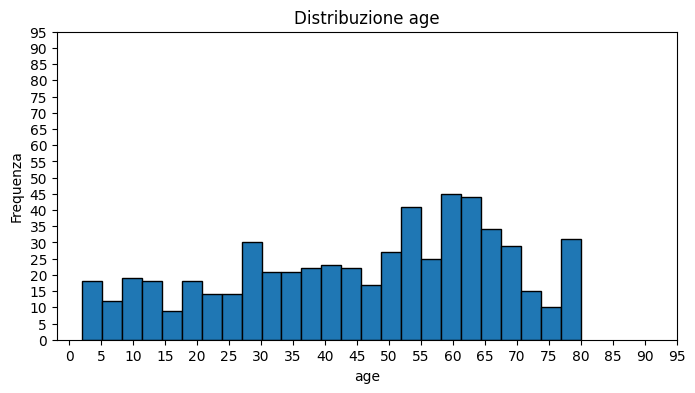

In [13]:
# age plot

plt.figure(figsize=(8, 4))
plt.hist(diabetes_train['age'], bins=25, edgecolor='black')
plt.title('Distribuzione age')
plt.xlabel('age')
plt.ylabel('Frequenza')
plt.xticks(ticks=np.arange(0,100,5), labels=[f'{i}' for i in range(0,100,5)])
plt.yticks(ticks=np.arange(0,100,5), labels=[f'{i}' for i in range(0,100,5)])
plt.grid(False)
plt.show()


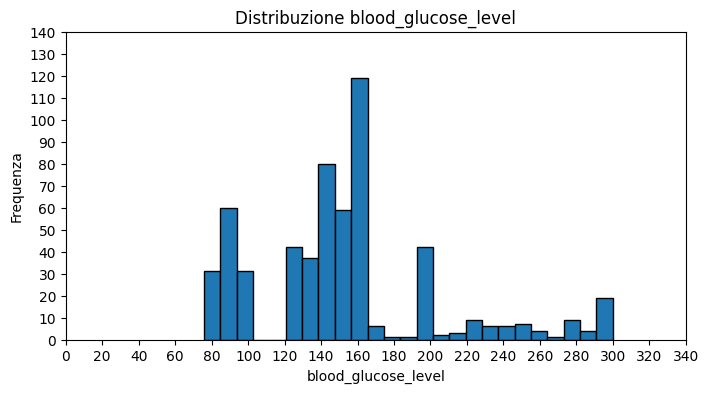

In [14]:
# blood_glucose_level

plt.figure(figsize=(8, 4))
plt.hist(diabetes_train['blood_glucose_level'], bins=25, edgecolor='black')
plt.title('Distribuzione blood_glucose_level')
plt.xlabel('blood_glucose_level')
plt.ylabel('Frequenza')
plt.xticks(ticks=np.arange(0,350,20), labels=[f'{i}' for i in range(0,350, 20)])
plt.yticks(ticks=np.arange(0,150,10), labels=[f'{i}' for i in range(0,150,10)])
plt.grid(False)
plt.show()


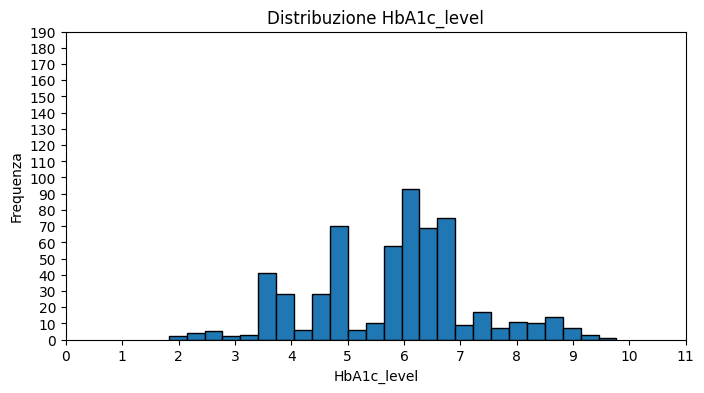

In [15]:
# HbA1c_level plot

plt.figure(figsize=(8, 4))
plt.hist(diabetes_train['HbA1c_level'], bins=25, edgecolor='black')
plt.title('Distribuzione HbA1c_level')
plt.xlabel('HbA1c_level')
plt.ylabel('Frequenza')
plt.xticks(ticks=np.arange(0,12,1), labels=[f'{i}' for i in range(0,12,1)])
plt.yticks(ticks=np.arange(0,200,10), labels=[f'{i}' for i in range(0,200,10)])
plt.grid(False)
plt.show()


Outlier detection: rimozione dei record con "bmi > 60"

In [16]:
diabetes_train = diabetes_train[diabetes_train['bmi'] <= 60]

Normalizzazione dei dati

In [17]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

diabetes_train['age'] = scaler.fit_transform(diabetes_train['age'].values.reshape(-1, 1))
diabetes_train['bmi'] = scaler.fit_transform(diabetes_train['bmi'].values.reshape(-1, 1))
diabetes_train['HbA1c_level'] = scaler.fit_transform(diabetes_train['HbA1c_level'].values.reshape(-1, 1))
diabetes_train['blood_glucose_level'] = scaler.fit_transform(diabetes_train['blood_glucose_level'].values.reshape(-1, 1))
diabetes_train['Random_Lab_Marker'] = scaler.fit_transform(diabetes_train['Random_Lab_Marker'].values.reshape(-1, 1))

display(diabetes_train)

<ipython-input-17-b9f17b144b43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_train['age'] = scaler.fit_transform(diabetes_train['age'].values.reshape(-1, 1))
<ipython-input-17-b9f17b144b43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_train['bmi'] = scaler.fit_transform(diabetes_train['bmi'].values.reshape(-1, 1))
<ipython-input-17-b9f17b144b43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,0.794872,0,0,0.365992,0.590557,0.363743,1.220942,4262.942153,0.364301,1,0,0,0,1,0
1,1,0.730769,1,0,0.534882,0.773548,0.324886,0.807652,4932.729931,0.394142,1,0,0,0,1,0
2,1,0.833333,0,0,0.463915,0.892885,0.735678,1.225950,7372.749574,0.688649,1,0,0,1,0,0
3,1,0.705128,0,0,0.518373,0.872793,0.351710,1.432736,5039.552869,0.403630,1,0,0,0,1,0
4,1,0.871795,0,0,0.659216,0.558346,0.417607,0.684205,6267.482417,0.648169,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,0.217949,0,0,0.409472,0.430752,0.379654,0.959618,4808.000000,0.628308,0,0,0,1,0,0
584,0,0.871795,0,0,0.301078,0.210658,0.371155,-1.084071,3935.250000,0.456664,0,0,0,0,0,1
585,1,0.743590,0,1,0.419961,0.500201,0.308716,-0.468180,4212.250000,0.740542,0,1,0,0,0,0
586,0,0.320513,0,0,0.372132,0.525379,0.554010,0.803267,5464.000000,0.782602,0,1,0,0,0,0


Rimozione della feature BMI_Glucose_Interaction

In [18]:
del diabetes_train['BMI_Glucose_Interaction']

display(diabetes_train)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,0.794872,0,0,0.365992,0.590557,0.363743,1.220942,0.364301,1,0,0,0,1,0
1,1,0.730769,1,0,0.534882,0.773548,0.324886,0.807652,0.394142,1,0,0,0,1,0
2,1,0.833333,0,0,0.463915,0.892885,0.735678,1.225950,0.688649,1,0,0,1,0,0
3,1,0.705128,0,0,0.518373,0.872793,0.351710,1.432736,0.403630,1,0,0,0,1,0
4,1,0.871795,0,0,0.659216,0.558346,0.417607,0.684205,0.648169,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,0.217949,0,0,0.409472,0.430752,0.379654,0.959618,0.628308,0,0,0,1,0,0
584,0,0.871795,0,0,0.301078,0.210658,0.371155,-1.084071,0.456664,0,0,0,0,0,1
585,1,0.743590,0,1,0.419961,0.500201,0.308716,-0.468180,0.740542,0,1,0,0,0,0
586,0,0.320513,0,0,0.372132,0.525379,0.554010,0.803267,0.782602,0,1,0,0,0,0


Si mostra la correlazione tra le features

In [19]:
diabetes_train.iloc[:, :-1].corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never
gender,1.000000,0.051493,-0.037337,0.095316,-0.083562,0.221621,0.097498,0.077447,0.050212,0.260258,0.094613,0.010341,0.046253,-0.090908
age,0.051493,1.000000,0.200403,0.165981,0.319930,0.217752,0.230985,0.060200,-0.088844,0.413171,0.054665,0.021057,0.128196,-0.203839
hypertension,-0.037337,0.200403,1.000000,0.049256,0.260641,0.146133,0.050841,-0.097138,-0.103592,0.121851,-0.082325,0.017492,-0.045050,0.122808
heart_disease,0.095316,0.165981,0.049256,1.000000,-0.007812,-0.082089,-0.073227,0.037010,0.079133,-0.067091,0.069822,0.071277,0.032648,-0.112252
bmi,-0.083562,0.319930,0.260641,-0.007812,1.000000,0.139997,0.243822,-0.168968,-0.035188,0.415086,-0.003796,-0.044261,0.010760,0.033513
HbA1c_level,0.221621,0.217752,0.146133,-0.082089,0.139997,1.000000,0.408329,0.089768,-0.035291,0.551151,-0.031526,-0.107546,0.116356,-0.005135
blood_glucose_level,0.097498,0.230985,0.050841,-0.073227,0.243822,0.408329,1.000000,-0.042595,-0.093390,0.584880,-0.122227,-0.053507,0.249740,-0.041217
Insulin_Sensitivity_Est,0.077447,0.060200,-0.097138,0.037010,-0.168968,0.089768,-0.042595,1.000000,0.066403,-0.029290,-0.012928,-0.119920,0.108092,-0.043303
Random_Lab_Marker,0.050212,-0.088844,-0.103592,0.079133,-0.035188,-0.035291,-0.093390,0.066403,1.000000,-0.117647,0.141501,-0.093808,-0.107196,0.013610
diabetes,0.260258,0.413171,0.121851,-0.067091,0.415086,0.551151,0.584880,-0.029290,-0.117647,1.000000,-0.051385,-0.107669,0.084688,0.053073


Divisione del dataset in features e label

In [20]:
# Dividing data in features and labels

X_train = diabetes_train.iloc[:, :-1].values
y_train = diabetes_train['diabetes'].values


Preprocessing Test set

In [21]:
# Import test set
diabetes_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_test.csv')

# Same preprocessing of the training set with exception of the outlier detection

diabetes_test['age'] = diabetes_test['age'].astype(int)


diabetes_test['smoking_history'] = diabetes_test['smoking_history'].replace('No Info', 'current')


for col in diabetes_test.select_dtypes(include=np.number).columns:
    mean_val = diabetes_test[col].mean()
    diabetes_test[col].fillna(mean_val, inplace=True)


labelenc_class = LabelEncoder()
labelenc_class.fit(diabetes_test['gender'].values)
diabetes_test['gender'] = labelenc_class.transform(diabetes_test['gender'].values)


diabetes_test = pd.get_dummies(diabetes_test, columns = ['smoking_history'])
columns = ['smoking_history_current',	'smoking_history_ever',	'smoking_history_former', 'smoking_history_never' ,'smoking_history_not current']
diabetes_test[columns] = diabetes_test[columns].astype(int)


diabetes_test['age'] = scaler.fit_transform(diabetes_test['age'].values.reshape(-1, 1))
diabetes_test['bmi'] = scaler.fit_transform(diabetes_test['bmi'].values.reshape(-1, 1))
diabetes_test['HbA1c_level'] = scaler.fit_transform(diabetes_test['HbA1c_level'].values.reshape(-1, 1))
diabetes_test['blood_glucose_level'] = scaler.fit_transform(diabetes_test['blood_glucose_level'].values.reshape(-1, 1))
diabetes_test['Random_Lab_Marker'] = scaler.fit_transform(diabetes_test['Random_Lab_Marker'].values.reshape(-1, 1))

del diabetes_test['BMI_Glucose_Interaction']

# Dividing data in features and labels

X_test = diabetes_test.iloc[:, :-1].values
y_test = diabetes_test['diabetes'].values

display(diabetes_test)

<ipython-input-21-2824501ad737>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_test[col].fillna(mean_val, inplace=True)


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,0.913580,0,0,0.390655,0.966138,1.000000,1.874574,0.569570,1,0,0,1,0,0
1,0,0.679012,0,0,0.578436,0.128765,0.242085,0.264573,0.817273,1,0,0,0,1,0
2,1,0.888889,0,0,0.391082,0.959601,0.994566,1.927612,0.566342,1,1,0,0,0,0
3,1,0.802469,0,0,0.386001,0.547567,0.361670,1.388626,0.368396,1,0,0,0,1,0
4,0,0.679012,0,0,0.755864,0.505424,1.000000,0.601001,0.635142,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,0.617284,0,0,0.378072,0.273435,0.227273,0.819003,0.213883,0,0,0,0,1,0
144,0,0.679012,0,0,0.390655,0.401038,0.090909,0.439735,0.703095,0,0,0,0,1,0
145,0,0.469136,0,0,0.390655,0.273435,0.272727,1.346416,0.420437,0,1,0,0,0,0
146,0,0.160494,0,0,0.389121,0.110855,0.363471,-0.630595,0.839962,0,1,0,0,0,0


# PCA

In [22]:
%%capture

# PCA
pca = PCA()

pca.fit(diabetes_train)

In [24]:
# Using PCA with fixed explained variance

explvar_p = 0.90
pca = PCA(explvar_p)
pca.fit(diabetes_train)
pca_diabetes = pca.transform(diabetes_train)

# Transform my data into data transformed by PCA
scaler_X = StandardScaler()
scaler_X.fit(diabetes_train)
X_scaled = scaler_X.transform(diabetes_train)

features_scalate = scaler_X.transform(diabetes_train)
Zpca = pca.transform(features_scalate)

df_pca = pd.DataFrame({'val': [pca.n_components_, np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,val
n. PC,7.00
expl. Var. (%),90.53


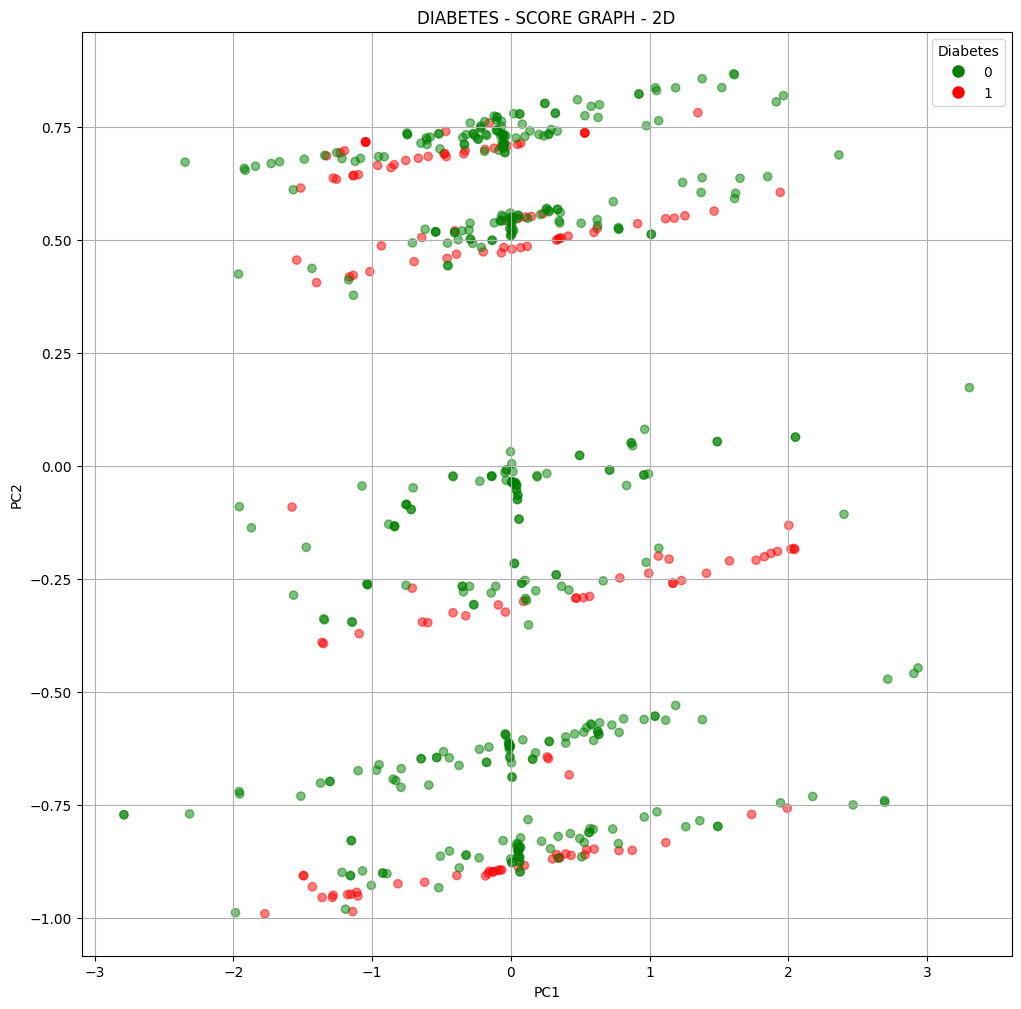

In [28]:
cmap = ListedColormap(['green', 'red'])

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(0), markersize=10, label='0'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(1), markersize=10, label='1')]
plt.figure(figsize=(12, 12))
plt.scatter(pca_diabetes[:, 0], pca_diabetes[:, 1], c=y_train, cmap=cmap, alpha=0.5)
plt.title('DIABETES - SCORE GRAPH - 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=handles, title='Diabetes')
plt.grid()
plt.show()

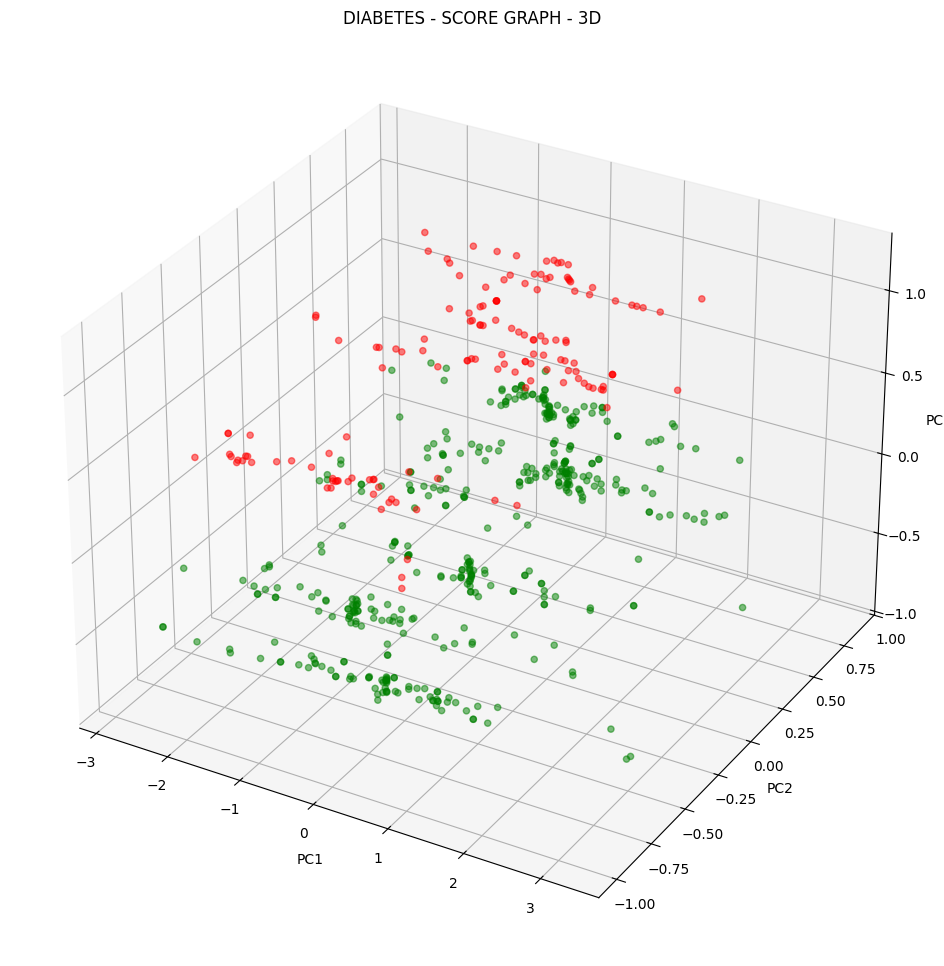

In [29]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_diabetes[:, 0], pca_diabetes[:, 1],pca_diabetes[:,2], c=y_train, cmap=cmap, alpha=0.5)
plt.title('DIABETES - SCORE GRAPH - 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

# SVM

SVM hard lineare

In [ ]:
# Accuracy of SVM hard

C_hard = 1e10
loss = 'squared_hinge'
dual = False

lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual)

lsvm_hard.fit(X_train, y_train)


df_lsvm_hard = pd.DataFrame({'acc.': [np.round(lsvm_hard.score(X_train, y_train)*100, decimals=2), np.round(lsvm_hard.score(X_test, y_test)*100, decimals=2)]},
                            index=['training', 'test'])
display(df_lsvm_hard)


,acc.
training,100.0
test,100.0


SVM soft non lineare

In [ ]:
# Sigmoid Kernel

ker_tanh = 'sigmoid'
gamma_tanh = 'auto'

C = 100

svm_tanh = SVC(C=C, kernel=ker_tanh, gamma=gamma_tanh)

svm_tanh.fit(X_train, y_train)

df_svm_tanh = pd.DataFrame({'acc. ': [np.round(svm_tanh.score(X_train, y_train)*100, decimals=2), np.round(svm_tanh.score(X_test, y_test)*100, decimals=2)]},
                          index=['training', 'test'])

df_styled=df_svm_tanh.style.set_caption('SVM SIGMOID')
display(df_styled)

,acc.
training,99.310000
test,98.650000


SVM soft non lineare

In [ ]:
# Rbf Kernel
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C = 100

svm_rbf = SVC(C=C, kernel=ker_rbf, gamma=gamma_rbf)


svm_rbf.fit(X_train, y_train)


df_svm_rbf = pd.DataFrame({'acc. ': [np.round(svm_rbf.score(X_train, y_train)*100, decimals=2), np.round(svm_rbf.score(X_test, y_test)*100, decimals=2)]},
                          index=['training', 'test'])
df_styled=df_svm_rbf.style.set_caption('SVM RBF')
display(df_styled)

,acc.
training,100.000000
test,100.000000


# KNN

KNN con k =5

In [ ]:
# Parametri
k = 5  # Numero di vicini da considerare

# Modello k-NN
knn = KNeighborsClassifier(n_neighbors=k)

# Addestramento
knn.fit(X_train, y_train)

# Valutazione
df_knn = pd.DataFrame({
    'acc.': [
        np.round(knn.score(X_train, y_train) * 100, decimals=2),
        np.round(knn.score(X_test, y_test) * 100, decimals=2)
    ]
}, index=['training', 'test'])

# Stile del DataFrame
df_styled = df_knn.style.set_caption(f'k-NN (k={k})')
display(df_styled)

,acc.
training,100.000000
test,100.000000


Plot della accuracy di KNN con vari valori di K

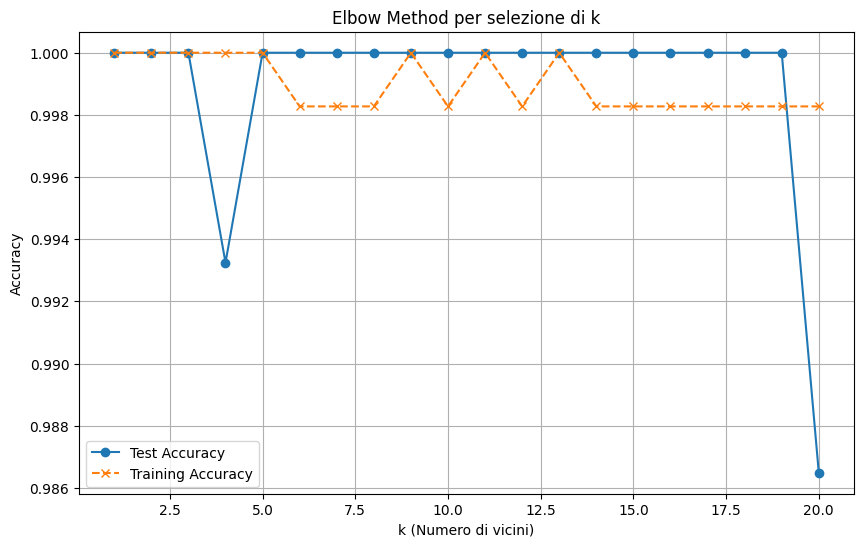

In [ ]:
train_scores = []
test_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, test_scores, label='Test Accuracy', marker='o')
plt.plot(k_range, train_scores, label='Training Accuracy', linestyle='--', marker='x')
plt.xlabel('k (Numero di vicini)')
plt.ylabel('Accuracy')
plt.title('Elbow Method per selezione di k')
plt.legend()
plt.grid(True)
plt.show()

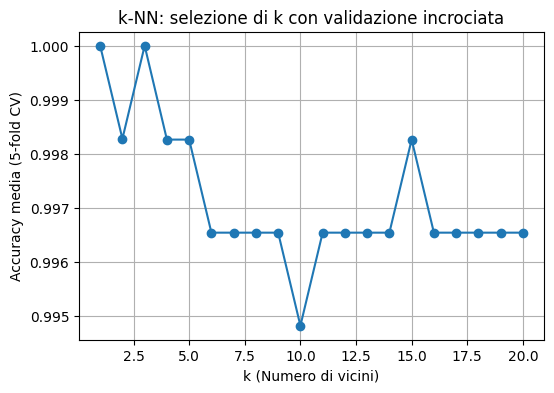

Miglior valore di k: 1 con accuracy media = 1.0000


In [ ]:
k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Esegui validazione incrociata a 5-fold
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Trova il k con la miglior accuracy media
best_k = k_range[np.argmax(cv_scores)]
best_score = max(cv_scores)

# Grafico
plt.figure(figsize=(6, 4))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('k (Numero di vicini)')
plt.ylabel('Accuracy media (5-fold CV)')
plt.title('k-NN: selezione di k con validazione incrociata')
plt.grid(True)
plt.show()

print(f"Miglior valore di k: {best_k} con accuracy media = {best_score:.4f}")

# Random Forest

Random Forest e calcolo metriche

In [ ]:
random_forest = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)


random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Output dei risultati
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)


df_rf = pd.DataFrame({
    'acc.': [
        np.round(random_forest.score(X_train, y_train) * 100, decimals=2),
        np.round(random_forest.score(X_test, y_test) * 100, decimals=2)
    ]
}, index=['training', 'test'])

# Visualizzazione
display(df_rf)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


,acc.
training,100.0
test,100.0


In [ ]:
# Nuovo modello per cross-validation (con gli stessi parametri)
rf_cv = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)

# Predizione con validazione incrociata
y_pred_cv = cross_val_predict(rf_cv, X_train, y_train, cv=5)

# Valutazione
accuracy_cv = accuracy_score(y_train, y_pred_cv)
conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)
conf_df_cv = pd.DataFrame(conf_matrix_cv, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Output
print("Cross-validated Accuracy:", accuracy_cv)
print("Confusion Matrix:\n", conf_df_cv)

Cross-validated Accuracy: 1.0
Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0          432            0
Actual 1            0          147


# Gradient Boost Machines

Gradient Boost Machines e calcolo metriche

In [ ]:

# 2. Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)  # Adjust

# 3. Create a GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=50)  # Potentially adjust hyperparameters

# 4. Train the model
# Train on the pre-defined X_train and y_train
gbm_model.fit(X_train, y_train)

# 5. Make predictions on the test set
# Predict on the pre-defined X_test
y_pred = gbm_model.predict(X_test)

# 6. Evaluate the model
# Evaluate using the pre-defined y_test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gradient Boosting Model: {accuracy}")

Accuracy of Gradient Boosting Model: 1.0


In [ ]:
# Calculate other performance metrics

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# For ROC AUC score, we need the probability of the positive class
y_prob = gbm_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (class 1)
roc_auc = roc_auc_score(y_test, y_prob)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC AUC Score: 1.0000

Confusion Matrix:
[[111   0]
 [  0  37]]
